We are now going to complete an example of how you would implement the steps of a PCA. There are routines in Python or R that would allow you to do it automatically, but working it out from first principles is a really good excercise.

Lets get started.



In [1]:
import numpy as np
a=np.array([[2.5,2.4],[0.5,0.7],[2.2,2.9],[1.9,2.2],[3.1,3.0],[2.3,2.7],[2,1.6],[1,1.1],[1.5,1.6],[1.1,0.9]])
ahat=(a - np.mean(a, axis=0))
ahat



array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

We have now centered our data around the mean of each column.

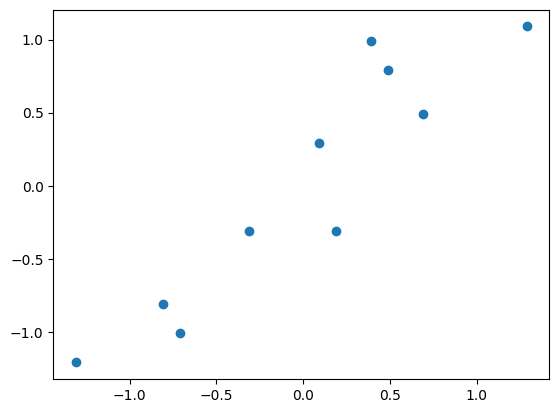

correlation matrix is 
 [[1.         0.92592927]
 [0.92592927 1.        ]]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
x=ahat[:,0]
y=ahat[:,1]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
plt.show()
print("correlation matrix is \n",np.corrcoef([x,y]))

The data is highly correlated is higly correlated with a $\rho=0.92$.

In [3]:
from numpy import linalg as LA
cov=(np.matmul(ahat.transpose(),ahat))/(len(ahat)-1)
print("covariance is:", cov)
vals, vecs = np.linalg.eig(cov)
# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]
print("eigenvalues are : ",vals)
print("eigenvectors are : ",vecs)

covariance is: [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]
eigenvalues are :  [1.28402771 0.0490834 ]
eigenvectors are :  [[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


Now we calcaulate the covariance matrix(cov) and the eigenvectors(vecs) and eigenvalues(vals) for the dataset. Notice how I sorted the vecs and values by using "np.argsort(-vals)" function in numpy. We need to have these values in the correct order

In [4]:

anew=np.matmul(vecs.transpose(),ahat.transpose())
print(anew.transpose())

[[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


Finally we create our new principal components as follows:
  
  >>$PC=B^T \hat{X^T}$

the first column of this new matrix corresponds to PC 1 and explains 96.01\% of the variation:
>> $\frac{1.28}{(1.2840+ 0.0491)}*100=96.01\%$

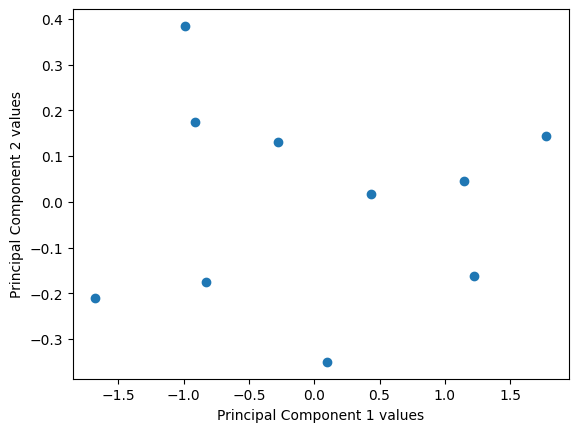

In [5]:
x=anew.transpose()[:,0]
y=anew.transpose()[:,1]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
plt.xlabel('Principal Component 1 values')
plt.ylabel('Principal Component 2 values')

plt.show()

Finally, we can see the plot of the new components and it shows us that most of the variation is in PC1. We could now with loss of to much information use PC1 to replace X and Y. Thus we have achieved 2 things with this operation. The first to create a new set of features that are not correlated and the second is to create a feature that is nearly as powerful as the original 2 features.

**Review**

Increase the number of dimensions and see if you can get the above code to calculate new principal components. Compare this apporach to the one outlined in MOOC 2.